In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import math
import pynamics
from pynamics.system import System
from pynamics.frame import Frame
import sympy
from pynamics.variable_types import Differentiable,Constant,Variable
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle
import pynamics.integration
plt.ion()
from math import pi

In [2]:
def length(v1):
    v1 = numpy.array(v1).flatten()
    l = (v1.dot(v1))**.5
    return l

In [3]:
def total_angle(v1,v2,v3=None):

    v1 = numpy.array(v1).flatten()
    if len(v1)==2:
        v1 = numpy.r_[v1,0]
        v3 = numpy.array([0,0,1])

        v2 = numpy.array(v2).flatten()
       
    if len(v2)==2:
        v2 = numpy.r_[v2,0]
        v3 = numpy.array([0,0,1])

    costheta = numpy.dot(v1,v2)
    sintheta  = numpy.cross(v1,v2)
    l_sintheta = length(sintheta)
    neg = sintheta.dot(v3)
    if neg<0:
        neg = -1
    else:
        neg=1
    theta = math.atan2(neg*l_sintheta,costheta)
    return theta  

In [4]:
def inner_angle(v1,v2):
    
    v1 = numpy.array(v1).flatten()
    l1 = length(v1)
    v2 = numpy.array(v2).flatten()
    l2 = length(v2)
    cost = numpy.dot(v1,v2)/l1/l2
    t = math.acos(cost)
    return t

In [5]:
'Initialising points'

p0_ini = 0,0
p1_ini = 1,0
p2_ini = 1.5,0.75
p3_ini = 1,1.5
p4_ini = 0,1.5
p5_ini = -0.5,0.75


'Putting points into an array'
p_ini = numpy.array([p0_ini,p1_ini,p2_ini,p3_ini,p4_ini,p5_ini])

'Naming points'
point_text = ['p0','p1','p2','p3','p4','p5','p6','p7','p8','p9']

In [6]:
'Appending order of the vectors to the list'

vector_order = []
vector_order.append((0,1))
vector_order.append((1,2))
vector_order.append((2,3))
vector_order.append((3,4))
vector_order.append((4,5))
vector_order.append((5,0))

'Putting them into an array'
vector_order = numpy.array(vector_order)

'Naming the vectors including q'
vector_text = ['v0','v1','v2','v3','v4','v5','v6','v7','v8','v9','v10']

'Calculating initial vectors'
v_ini = p_ini[vector_order[:,1]]-p_ini[vector_order[:,0]]

'Calculating length of the initial vectors'
l_ini = [length(item) for item in v_ini]

'Finding the mid point of the vector to label the vector'
text_location = (p_ini[vector_order[:,1]]+p_ini[vector_order[:,0]])/2

In [7]:
'Plotting the mechanism'

def plot_mechanism(point_location,text_location=None):
    
    for item in vector_order:
        plt.plot(*(point_location[item,:3].T),'ko-')
    
    'labelling points and vectors, when the midpoint is given'
    if text_location is not None:
        for item,text in zip(point_location,point_text):
            ax.text(x=item[0],y=item[1],s=text)

        for item,text in zip(text_location,vector_text):
            ax.text(x=item[0],y=item[1],s=text)

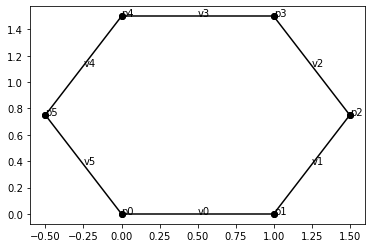

In [8]:
'Opening a figure window and plotting the mechanism'

fig = plt.figure();
ax = fig.add_subplot(111)
'function call for plot_mechanism'
plot_mechanism(p_ini,text_location)
plt.show()

In [9]:
global_q = False
use_constraints = False
system = System()
pynamics.set_system(__name__,system)

In [10]:
lA = Constant(1,'lA',system)
lB = Constant(1,'lB',system)
lC = Constant(1,'lC',system)
lD = Constant(1,'lD',system)
lE = Constant(1,'lE',system)
lF = Constant(1,'lF',system)

# mA = Constant(1,'mA',system)
# mB = Constant(1,'mB',system)
# mC = Constant(1,'mC',system)

# g = Constant(9.81,'g',system)
# b = Constant(1e1,'b',system)
# k = Constant(1e1,'k',system)

# preload1 = Constant(0*pi/180,'preload1',system)
# preload2 = Constant(0*pi/180,'preload2',system)
# preload3 = Constant(0*pi/180,'preload3',system)

In [11]:
Ixx_A = Constant(1,'Ixx_A',system)
Iyy_A = Constant(1,'Iyy_A',system)
Izz_A = Constant(1,'Izz_A',system)
Ixx_B = Constant(1,'Ixx_B',system)
Iyy_B = Constant(1,'Iyy_B',system)
Izz_B = Constant(1,'Izz_B',system)
Ixx_C = Constant(1,'Ixx_C',system)
Iyy_C = Constant(1,'Iyy_C',system)
Izz_C = Constant(1,'Izz_C',system)
Ixx_D = Constant(1,'Ixx_D',system)
Iyy_D = Constant(1,'Iyy_D',system)
Izz_D = Constant(1,'Izz_D',system)
Ixx_E = Constant(1,'Ixx_E',system)
Iyy_E = Constant(1,'Iyy_E',system)
Izz_E = Constant(1,'Izz_E',system)
Ixx_F = Constant(1,'Ixx_F',system)
Iyy_F = Constant(1,'Iyy_F',system)
Izz_F = Constant(1,'Izz_F',system)

tol = 1e-12 #tolerance

tinitial = 0
tfinal = 10
fps = 30
tstep = 1/fps
t = numpy.r_[tinitial:tfinal:tstep]

In [12]:
N = Frame('N')
A = Frame('A')
B = Frame('B')
C = Frame('C')
D = Frame('D')
E = Frame('E')
F = Frame('F')

In [13]:
qA,qA_d,qA_dd = Differentiable('qA',system)
qB,qB_d,qB_dd = Differentiable('qB',system)
qC,qC_d,qC_dd = Differentiable('qC',system)
qD,qD_d,qD_dd = Differentiable('qD',system)
qE,qE_d,qE_dd = Differentiable('qE',system)
qF,qF_d,qF_dd = Differentiable('qF',system)

In [14]:
system.set_newtonian(N)
A.rotate_fixed_axis_directed(N,[0,0,1],qA,system)
B.rotate_fixed_axis_directed(A,[0,0,1],qB,system)
C.rotate_fixed_axis_directed(B,[0,0,1],qC,system)
D.rotate_fixed_axis_directed(C,[0,0,1],qD,system) 
E.rotate_fixed_axis_directed(D,[0,0,1],qE,system)
F.rotate_fixed_axis_directed(E,[0,0,1],qF,system)

In [15]:
'Vectors defined along their lengths'

vN = 0*N.x + 0*N.y + 0*N.z
vA = vN + lA*A.x
vB = vA + lB*B.x
vC = vB + lC*C.x
vD = vC + lD*D.x
vE = vD + lE*E.x
vF = vE + lF*F.x

In [16]:
'initial values'

initialvalues = {}
initialvalues[qA]=90*pi/180
initialvalues[qA_d]=0*pi/180
initialvalues[qB]=90*pi/180
initialvalues[qB_d]=0*pi/180
initialvalues[qC]=180*pi/180
initialvalues[qC_d]=0*pi/180
initialvalues[qD]=90*pi/180
initialvalues[qD_d]=0*pi/180
initialvalues[qE]=90*pi/180
initialvalues[qE_d]=0*pi/180
initialvalues[qF]=180*pi/180
initialvalues[qF_d]=0*pi/180

statevariables = system.get_state_variables()
ini = [initialvalues[item] for item in statevariables]

In [17]:
'Centre of mass'

# Acm=vN+lA/2*A.x
# Bcm=vA+lB/2*B.x
# Ccm=vB+lC/2*C.x
# Dcm=vC+lD/2*D.x
# Ecm=vD+lE/2*E.x
# Fcm=vE+lF/2*F.x

'Centre of mass'

In [18]:
'angular velocity'

wNA = N.getw_(A)
wAB = A.getw_(B)
wBC = B.getw_(C)
wCD = C.getw_(D)
wDE = D.getw_(E)
wEF = E.getw_(F)
wFA = F.getw_(A)

'Derivative of vectors'
vend_effector = vF.time_derivative(N,system)



In [19]:
'Calculating Inertia'

IA = Dyadic.build(A,Ixx_A,Iyy_A,Izz_A)
IB = Dyadic.build(B,Ixx_B,Iyy_B,Izz_B)
IC = Dyadic.build(C,Ixx_C,Iyy_C,Izz_C)
ID = Dyadic.build(D,Ixx_D,Iyy_D,Izz_D)
IE = Dyadic.build(E,Ixx_E,Iyy_E,Izz_E)
IF = Dyadic.build(F,Ixx_F,Iyy_F,Izz_F)

BodyA = Body('BodyA',A,pAcm,mA,IA,system)
BodyB = Body('BodyB',B,pBcm,mB,IB,system)
#BodyC = Body('BodyC',C,pCcm,mC,IC,system)
BodyC = Particle(pCcm,mC,'ParticleC',system)

NameError: name 'pAcm' is not defined